In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cred_raw=pd.read_csv('Credit_card.csv')
cred_label_raw=pd.read_csv('Credit_card_label.csv')

In [ ]:
cred_raw

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [ ]:
cred_label_raw

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


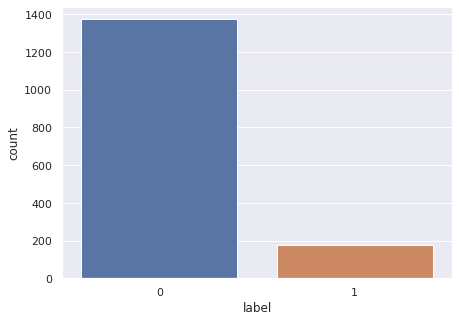

In [ ]:
sns.countplot(data=cred_label_raw, x='label')
#Outcome Variable is not balanced

In [ ]:
cred_label_raw['label'].unique()

array([1, 0])

In [ ]:
cred_label_raw['label'].isnull().sum()

0

In [ ]:
cred_raw.shape

(1548, 18)

In [ ]:
cred_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [ ]:
cred_raw.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

In [ ]:
#Almost 40 % missing values in Occupation column
cred_raw1=cred_raw.drop(['Type_Occupation'],axis=1)

In [ ]:
pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 KB 5.3 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29898 sha256=ad5c8b2a2dc71b017a83871f829e19d7e234ce21bf4579825a28e985baa35ec5
  Stored in directory: /root/.cache/pip/wheels/45/e1/7c/5f6e503d959df84af6d91e87ae288961a906f895d910f6533b
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=7c70fc6b45569f034d55eaead9b0bc373ed2d83124f36210a8a4dd5398108f49
  Stored in directory: /root/.cache/pip/wheels/5f/e9/7a/9969b4e11eb626b45f12a46849b8c65aa718244a243583caf1
Successfully built fancyimpute knnimpute


In [ ]:
cred_raw1.nunique()

Ind_ID            1548
GENDER               2
Car_Owner            2
Propert_Owner        2
CHILDREN             6
Annual_income      115
Type_Income          4
EDUCATION            5
Marital_status       5
Housing_type         6
Birthday_count    1270
Employed_days      956
Mobile_phone         1
Work_Phone           2
Phone                2
EMAIL_ID             2
Family_Members       7
dtype: int64

In [ ]:
cred_raw2=cred_raw1.drop(['Mobile_phone','Work_Phone','Phone','EMAIL_ID'],axis=1)

In [ ]:
cred_raw2.skew()

<ipython-input-14-855a2179be49>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cred_raw2.skew()


Ind_ID            0.072346
CHILDREN          4.631122
Annual_income     3.924564
Birthday_count   -0.171087
Employed_days     1.770964
Family_Members    2.232273
dtype: float64

In [ ]:
cred_raw2['GENDER'] = cred_raw2['GENDER'].replace(['F','M'],[0,1])
print(cred_raw2['GENDER'].value_counts())

0.0    973
1.0    568
Name: GENDER, dtype: int64


In [ ]:
cred_raw2['Car_Owner'] = cred_raw2['Car_Owner'].replace(['N','Y'],[0,1])
print(cred_raw2['Car_Owner'].value_counts())

0    924
1    624
Name: Car_Owner, dtype: int64


In [ ]:
cred_raw2['Propert_Owner'] = cred_raw2['Propert_Owner'].replace(['N','Y'],[0,1])
print(cred_raw2['Propert_Owner'].value_counts())

1    1010
0     538
Name: Propert_Owner, dtype: int64


In [ ]:
print(cred_raw2['Type_Income'].value_counts(sort=False))
print(cred_raw2['Type_Income'].value_counts(normalize=True,sort=False))
cred_raw2.loc[cred_raw2['Type_Income']=='Pensioner','Type_Income']='State servant'
cred_raw2.loc[cred_raw2['Type_Income']=='Student','Type_Income']='State servant'

Pensioner               269
Commercial associate    365
Working                 798
State servant           116
Name: Type_Income, dtype: int64
Pensioner               0.173773
Commercial associate    0.235788
Working                 0.515504
State servant           0.074935
Name: Type_Income, dtype: float64


In [ ]:
continues = cred_raw2.copy()

In [ ]:
continues.loc[continues['Type_Income']=='Pensioner','Type_Income']='State servant'
continues.loc[continues['Type_Income']=='Student','Type_Income']='State servant'

continues.loc[continues['Type_Income']=='State servant','Type_Income']=1
continues.loc[continues['Type_Income']=='Working','Type_Income']=2
continues.loc[continues['Type_Income']=='Commercial associate','Type_Income']=3

In [ ]:
continues['Housing_type'].unique()

array(['House / apartment', 'With parents', 'Rented apartment',
       'Municipal apartment', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [ ]:
continues.loc[continues['Housing_type']=='With parents','Housing_type']=1
continues.loc[continues['Housing_type']=='Co-op apartment','Housing_type']=2
continues.loc[continues['Housing_type']=='Rented apartment','Housing_type']=3
continues.loc[continues['Housing_type']=='Office apartment','Housing_type']=4
continues.loc[continues['Housing_type']=='Municipal apartment','Housing_type']=5
continues.loc[continues['Housing_type']=='House / apartment','Housing_type']=6

continues['Housing_type']

0       6
1       6
2       6
3       6
4       6
       ..
1543    6
1544    6
1545    6
1546    6
1547    6
Name: Housing_type, Length: 1548, dtype: object

In [ ]:
temp_dict={'Academic degree':1,'Higher education':2,'Secondary / secondary special':3,'Lower secondary':4,'Incomplete higher':5}
continues['EDUCATION']=cred_raw2.EDUCATION.map(temp_dict)
continues['EDUCATION']

0       2
1       2
2       2
3       2
4       2
       ..
1543    2
1544    5
1545    2
1546    3
1547    2
Name: EDUCATION, Length: 1548, dtype: int64

In [ ]:
#pre relationship
continues.loc[continues['Marital_status']=='Single / not married','Marital_status']=1

# relationship
continues.loc[continues['Marital_status']=='Civil marriage','Marital_status']=2
continues.loc[continues['Marital_status']=='Married','Marital_status']=3

# post  relationship
continues.loc[continues['Marital_status']=='Separated','Marital_status']=4
continues.loc[continues['Marital_status']=='Widow','Marital_status']=5

continues['Marital_status']

0       3
1       3
2       3
3       3
4       3
       ..
1543    3
1544    1
1545    3
1546    2
1547    3
Name: Marital_status, Length: 1548, dtype: object

In [ ]:
continues.isnull().sum()

Ind_ID             0
GENDER             7
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income     23
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count    22
Employed_days      0
Family_Members     0
dtype: int64

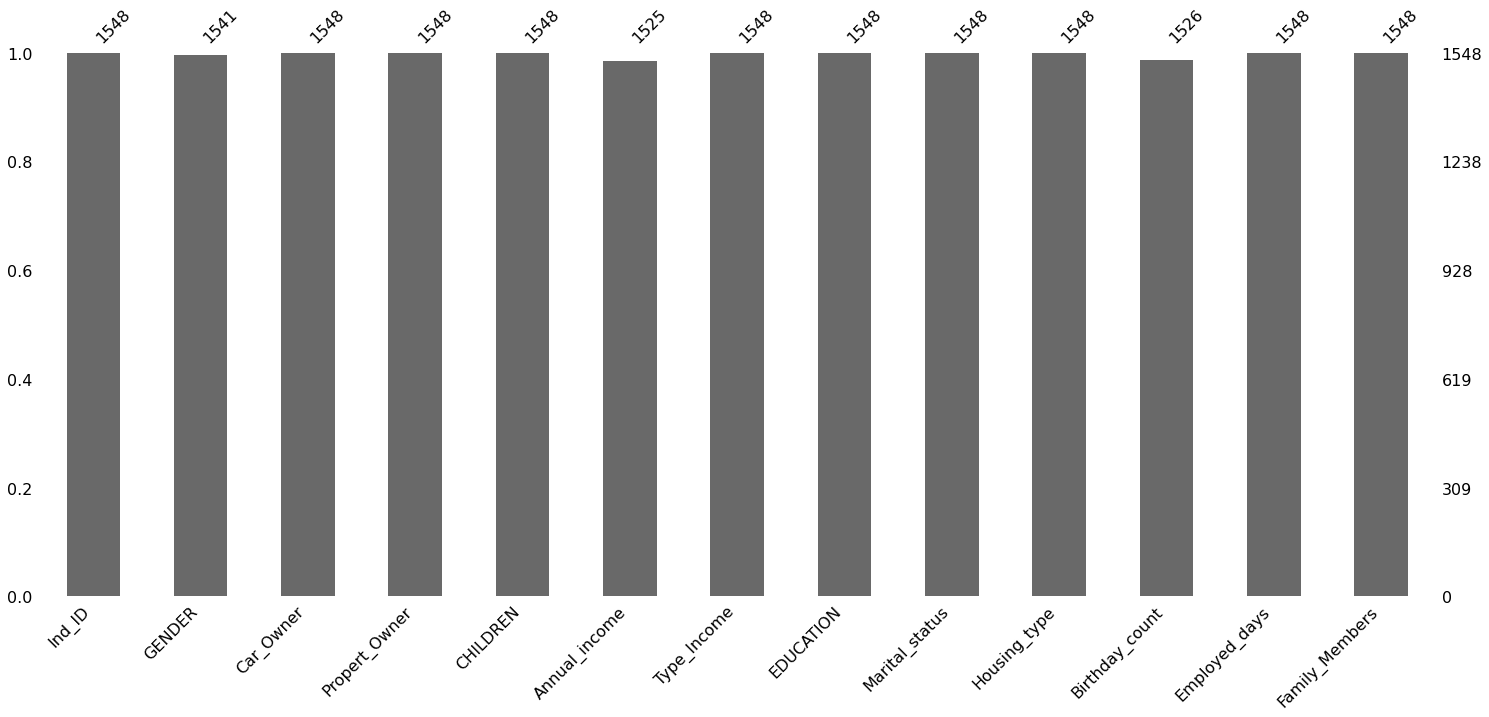

In [ ]:
import missingno as msno
# creating bar plot to see the missing values
msno.bar(continues)

In [ ]:
# when we divide the birthday_count by 365 we will get age of the individual
continues['Birthday_count']=-(cred_raw2['Birthday_count'])//365

In [ ]:
continues['Employed_days']=-(cred_raw2['Employed_days'])//365
continues['Employed_days'][continues['Employed_days']<0] = np.NaN

<ipython-input-28-3ade24b29348>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continues['Employed_days'][continues['Employed_days']<0] = np.NaN


In [ ]:
continues['CHILDREN'] = continues['CHILDREN'].astype('category')

In [ ]:
continues

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Family_Members
0,5008827,1.0,1,1,0,180000.0,1,2,3,6,51.0,NaN,2
1,5009744,0.0,1,0,0,315000.0,3,2,3,6,37.0,1.0,2
2,5009746,0.0,1,0,0,315000.0,3,2,3,6,NaN,1.0,2
3,5009749,0.0,1,0,0,NaN,3,2,3,6,37.0,1.0,2
4,5009752,0.0,1,0,0,315000.0,3,2,3,6,37.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0.0,0,1,0,NaN,3,2,3,6,32.0,5.0,2
1544,5023655,0.0,0,0,0,225000.0,3,5,1,6,28.0,3.0,1
1545,5115992,1.0,1,1,2,180000.0,2,2,3,6,36.0,6.0,4
1546,5118219,1.0,1,0,0,270000.0,2,3,2,6,41.0,1.0,2


In [ ]:
from fancyimpute import KNN
knn_imputer = KNN()
continues_knn = continues.copy(deep=True)
continues_knn.iloc[:, :] = knn_imputer.fit_transform(continues_knn)

/usr/local/lib/python3.8/dist-packages/fancyimpute/solver.py:127: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, force_all_finite=False)


Imputing row 1/1548 with 1 missing, elapsed time: 0.840
Imputing row 101/1548 with 0 missing, elapsed time: 0.843
Imputing row 201/1548 with 1 missing, elapsed time: 0.846
Imputing row 301/1548 with 0 missing, elapsed time: 0.848
Imputing row 401/1548 with 0 missing, elapsed time: 0.850
Imputing row 501/1548 with 0 missing, elapsed time: 0.852
Imputing row 601/1548 with 0 missing, elapsed time: 0.854
Imputing row 701/1548 with 0 missing, elapsed time: 0.855
Imputing row 801/1548 with 0 missing, elapsed time: 0.857
Imputing row 901/1548 with 0 missing, elapsed time: 0.858
Imputing row 1001/1548 with 0 missing, elapsed time: 0.859
Imputing row 1101/1548 with 1 missing, elapsed time: 0.860
Imputing row 1201/1548 with 1 missing, elapsed time: 0.861
Imputing row 1301/1548 with 0 missing, elapsed time: 0.863
Imputing row 1401/1548 with 0 missing, elapsed time: 0.864
Imputing row 1501/1548 with 0 missing, elapsed time: 0.865


In [ ]:
continues_knn

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Family_Members
0,5008827.0,1.0,1.0,1.0,0.0,180000.000000,1.0,2.0,3.0,6.0,51.000000,5.053092,2.0
1,5009744.0,0.0,1.0,0.0,0.0,315000.000000,3.0,2.0,3.0,6.0,37.000000,1.000000,2.0
2,5009746.0,0.0,1.0,0.0,0.0,315000.000000,3.0,2.0,3.0,6.0,36.999998,1.000000,2.0
3,5009749.0,0.0,1.0,0.0,0.0,315000.004618,3.0,2.0,3.0,6.0,37.000000,1.000000,2.0
4,5009752.0,0.0,1.0,0.0,0.0,315000.000000,3.0,2.0,3.0,6.0,37.000000,1.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645.0,0.0,0.0,1.0,0.0,192997.721670,3.0,2.0,3.0,6.0,32.000000,5.000000,2.0
1544,5023655.0,0.0,0.0,0.0,0.0,225000.000000,3.0,5.0,1.0,6.0,28.000000,3.000000,1.0
1545,5115992.0,1.0,1.0,1.0,2.0,180000.000000,2.0,2.0,3.0,6.0,36.000000,6.000000,4.0
1546,5118219.0,1.0,1.0,0.0,0.0,270000.000000,2.0,3.0,2.0,6.0,41.000000,1.000000,2.0


In [ ]:
continues_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ind_ID          1548 non-null   float64
 1   GENDER          1548 non-null   float64
 2   Car_Owner       1548 non-null   float64
 3   Propert_Owner   1548 non-null   float64
 4   CHILDREN        1548 non-null   float64
 5   Annual_income   1548 non-null   float64
 6   Type_Income     1548 non-null   float64
 7   EDUCATION       1548 non-null   float64
 8   Marital_status  1548 non-null   float64
 9   Housing_type    1548 non-null   float64
 10  Birthday_count  1548 non-null   float64
 11  Employed_days   1548 non-null   float64
 12  Family_Members  1548 non-null   float64
dtypes: float64(13)
memory usage: 157.3 KB


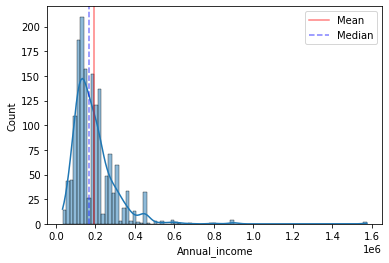

In [ ]:
sns.histplot(data = continues_knn['Annual_income'], kde = True)
plt.axvline(x=continues_knn.Annual_income.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=continues_knn.Annual_income.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
# it is right skewed 

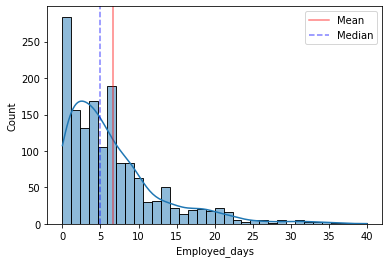

In [ ]:
sns.histplot(data = continues_knn['Employed_days'], kde = True)
plt.axvline(x=continues_knn.Employed_days.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=continues_knn.Employed_days.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
# different categories are merging here

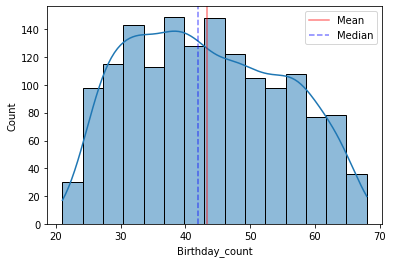

In [ ]:
sns.histplot(data = continues_knn['Birthday_count'], kde = True)
plt.axvline(x=continues_knn.Birthday_count.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=continues_knn.Birthday_count.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()
# almost normally distributed

In [ ]:
continues_knn['GENDER'] = continues_knn['GENDER'].astype('category')
continues_knn['Car_Owner'] = continues_knn['Car_Owner'].astype('category')
continues_knn['Propert_Owner'] = continues_knn['Propert_Owner'].astype('category')
continues_knn['Type_Income'] =continues_knn['Type_Income'].astype('category')
continues_knn['Housing_type'] = continues_knn['Housing_type'].astype('category')
continues_knn['EDUCATION'] = continues_knn['EDUCATION'].astype('category')
continues_knn['Marital_status'] = continues_knn['Marital_status'].astype('category')
continues_knn['CHILDREN'] = continues_knn['CHILDREN'].astype('category')
continues_knn['Ind_ID'] = continues_knn['Ind_ID'].astype('int64')
continues_knn['Annual_income'] = continues_knn['Annual_income'].astype('int64')
continues_knn['Birthday_count'] = continues_knn['Birthday_count'].astype('int64')
continues_knn['Employed_days'] = continues_knn['Employed_days'].astype('int64')
continues_knn['Family_Members'] = continues_knn['Family_Members'].astype('category')

In [ ]:
continues_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Ind_ID          1548 non-null   int64   
 1   GENDER          1548 non-null   category
 2   Car_Owner       1548 non-null   category
 3   Propert_Owner   1548 non-null   category
 4   CHILDREN        1548 non-null   category
 5   Annual_income   1548 non-null   int64   
 6   Type_Income     1548 non-null   category
 7   EDUCATION       1548 non-null   category
 8   Marital_status  1548 non-null   category
 9   Housing_type    1548 non-null   category
 10  Birthday_count  1548 non-null   int64   
 11  Employed_days   1548 non-null   int64   
 12  Family_Members  1548 non-null   category
dtypes: category(9), int64(4)
memory usage: 64.0 KB


In [ ]:
continues_knn

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Family_Members
0,5008827,1.0,1.0,1.0,0.0,180000,1.0,2.0,3.0,6.0,51,5,2.0
1,5009744,0.0,1.0,0.0,0.0,315000,3.0,2.0,3.0,6.0,37,1,2.0
2,5009746,0.0,1.0,0.0,0.0,315000,3.0,2.0,3.0,6.0,36,1,2.0
3,5009749,0.0,1.0,0.0,0.0,315000,3.0,2.0,3.0,6.0,37,1,2.0
4,5009752,0.0,1.0,0.0,0.0,315000,3.0,2.0,3.0,6.0,37,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0.0,0.0,1.0,0.0,192997,3.0,2.0,3.0,6.0,32,5,2.0
1544,5023655,0.0,0.0,0.0,0.0,225000,3.0,5.0,1.0,6.0,28,3,1.0
1545,5115992,1.0,1.0,1.0,2.0,180000,2.0,2.0,3.0,6.0,36,6,4.0
1546,5118219,1.0,1.0,0.0,0.0,270000,2.0,3.0,2.0,6.0,41,1,2.0


In [ ]:
continues_knn.skew()
# high skewness in annual income and employed days

<ipython-input-40-bc0b78adea2a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  continues_knn.skew()


Ind_ID            0.072346
Annual_income     3.906577
Birthday_count    0.177340
Employed_days     1.742960
dtype: float64

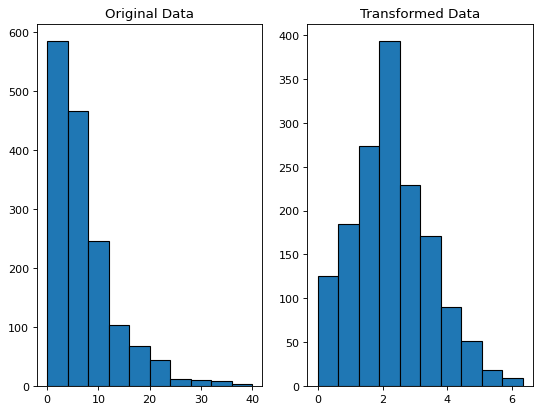

In [ ]:
#sqrt transformation
trans_data = continues_knn['Employed_days']**(1/2)
data = continues_knn['Employed_days']

# Define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 6), dpi=80)

# Create histograms
axs[0].hist(data, edgecolor='black')
axs[1].hist(trans_data, edgecolor='black')

# Add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Transformed Data')
continues_knn['Employed_days']=continues_knn['Employed_days']**(1/2)


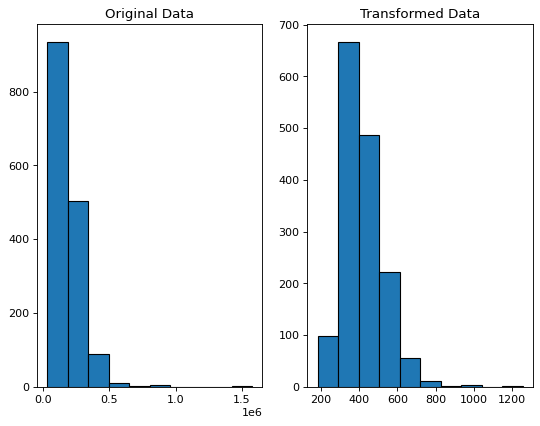

In [ ]:
trans_data = continues_knn['Annual_income']**(1/2)
data = continues_knn['Annual_income']

# Define grid of plots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 6), dpi=80)

# Create histograms
axs[0].hist(data, edgecolor='black')
axs[1].hist(trans_data, edgecolor='black')

# Add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Transformed Data')
continues_knn['Annual_income']=continues_knn['Annual_income']**(1/2)


Feature Selection

In [ ]:
continues_2 = continues_knn.copy()


In [ ]:
from scipy.stats import chi2_contingency
import seaborn as sns

In [ ]:
from sklearn.feature_selection import chi2
X = continues_knn.drop(columns = ['Annual_income','Birthday_count','Employed_days',"Ind_ID",'GENDER'],axis=1)
y = cred_label_raw['label']

In [ ]:
continues_knn

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Family_Members
0,5008827,1.0,1.0,1.0,0.0,424.264069,1.0,2.0,3.0,6.0,51,2.236068,2.0
1,5009744,0.0,1.0,0.0,0.0,561.248608,3.0,2.0,3.0,6.0,37,1.000000,2.0
2,5009746,0.0,1.0,0.0,0.0,561.248608,3.0,2.0,3.0,6.0,36,1.000000,2.0
3,5009749,0.0,1.0,0.0,0.0,561.248608,3.0,2.0,3.0,6.0,37,1.000000,2.0
4,5009752,0.0,1.0,0.0,0.0,561.248608,3.0,2.0,3.0,6.0,37,1.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0.0,0.0,1.0,0.0,439.314238,3.0,2.0,3.0,6.0,32,2.236068,2.0
1544,5023655,0.0,0.0,0.0,0.0,474.341649,3.0,5.0,1.0,6.0,28,1.732051,1.0
1545,5115992,1.0,1.0,1.0,2.0,424.264069,2.0,2.0,3.0,6.0,36,2.449490,4.0
1546,5118219,1.0,1.0,0.0,0.0,519.615242,2.0,3.0,2.0,6.0,41,1.000000,2.0


In [ ]:
chi_scores = chi2(X,y)
chi_scores
# higher the value higher the importance

(array([0.20058651, 0.17249583, 1.05929098, 0.05886625, 0.15109318,
        0.18916941, 0.00641816, 0.60629632]),
 array([0.65424785, 0.67790314, 0.30337695, 0.80829693, 0.69749286,
        0.66360881, 0.93614706, 0.43618573]))

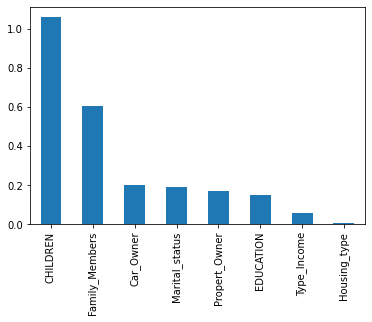

In [ ]:
# higher the chi value highet the importance
chi_values = pd.Series(chi_scores[0],index=X.columns)
chi_values.sort_values(ascending=False , inplace=True)
chi_values.plot.bar()

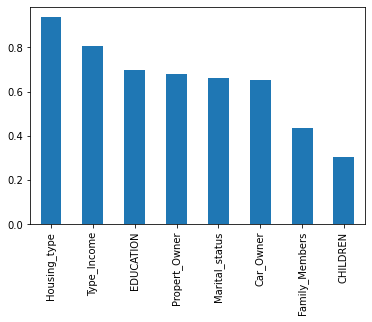

In [ ]:
#joined_table = pd.merge(continues_knn,cred_label_raw,how='inner',on='Ind_ID')
#joined_table.head(20)
# higher the p value lower the importance
p_values = pd.Series(chi_scores[1],index=X.columns)
p_values.sort_values(ascending=False , inplace=True)
p_values.plot.bar()

In [ ]:
#joined_table_2 = pd.merge(cred_raw , cred_label_raw , how='inner',on='Ind_ID')
#joined_table_2.head(20)

In [ ]:
continues_3 = continues_knn.drop(['Housing_type','Type_Income'],axis=1)

In [ ]:
continues_3

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Marital_status,Birthday_count,Employed_days,Family_Members
0,5008827,1.0,1.0,1.0,0.0,424.264069,2.0,3.0,51,2.236068,2.0
1,5009744,0.0,1.0,0.0,0.0,561.248608,2.0,3.0,37,1.000000,2.0
2,5009746,0.0,1.0,0.0,0.0,561.248608,2.0,3.0,36,1.000000,2.0
3,5009749,0.0,1.0,0.0,0.0,561.248608,2.0,3.0,37,1.000000,2.0
4,5009752,0.0,1.0,0.0,0.0,561.248608,2.0,3.0,37,1.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0.0,0.0,1.0,0.0,439.314238,2.0,3.0,32,2.236068,2.0
1544,5023655,0.0,0.0,0.0,0.0,474.341649,5.0,1.0,28,1.732051,1.0
1545,5115992,1.0,1.0,1.0,2.0,424.264069,2.0,3.0,36,2.449490,4.0
1546,5118219,1.0,1.0,0.0,0.0,519.615242,3.0,2.0,41,1.000000,2.0


In [ ]:
continues_4=continues_3.copy()

In [ ]:
continues_5 = continues_4.drop(['Ind_ID','GENDER','Car_Owner','Propert_Owner','CHILDREN','EDUCATION','Marital_status','Family_Members'],axis=1)

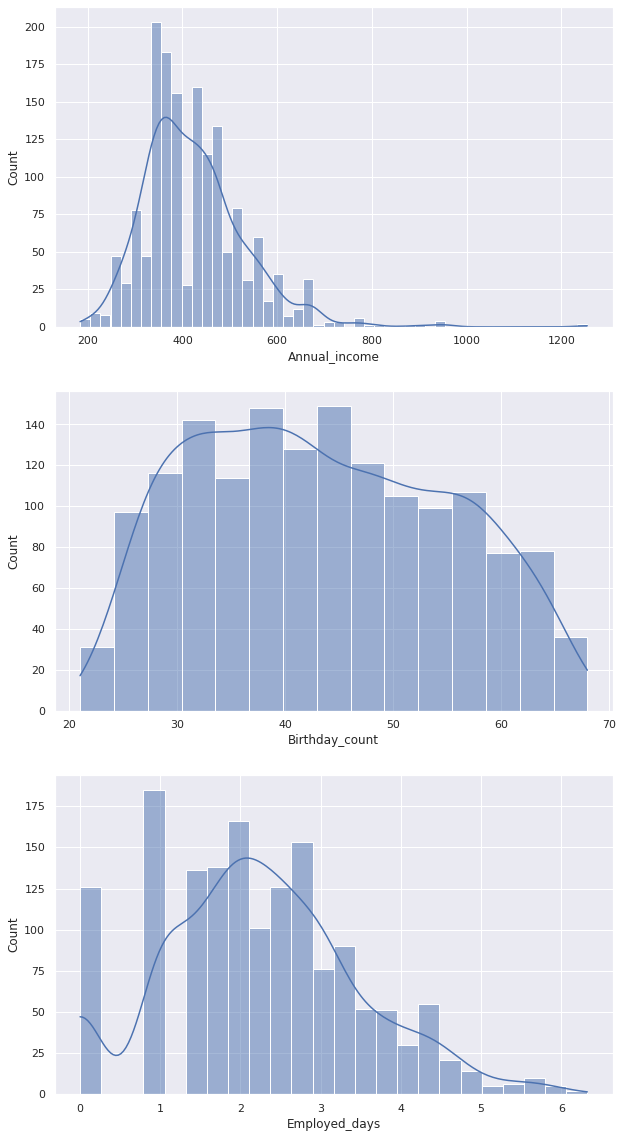

In [ ]:
plt.figure(figsize=(10,20))
for i in enumerate(continues_5.columns):
  plt.subplot(3, 1, i[0]+1)
  sns.set(rc={'figure.figsize':(7,5)})
  sns.histplot(data=continues_4, x=i[1], kde=True)
  #Eventhough some skewness is there in Annual Income , Employed Days

#Dealing With Outliers

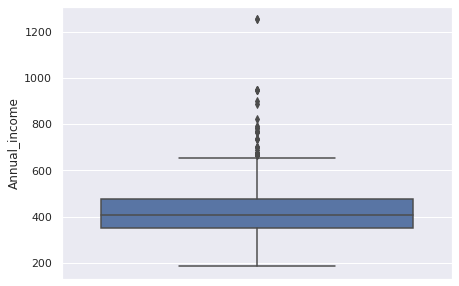

In [ ]:
sns.boxplot(y=continues_4['Annual_income'])

In [ ]:
Q1 = np.percentile(continues_4['Annual_income'], 25, interpolation = 'midpoint')
Q2 = np.percentile(continues_4['Annual_income'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(continues_4['Annual_income'], 75, interpolation = 'midpoint')

In [ ]:
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)
outlier =[]
for x in continues_4['Annual_income']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

Interquartile range is 125.7731478665894
low_limit is 159.90877935878342
up_limit is 663.0013708251411
 outlier in the dataset is [670.820393249937, 670.820393249937, 670.820393249937, 687.386354243376, 734.8469228349534, 734.8469228349534, 670.820393249937, 821.5838362577492, 764.8529270389178, 764.8529270389178, 670.6638502260279, 670.820393249937, 670.820393249937, 670.820393249937, 670.820393249937, 670.820393249937, 670.820393249937, 667.4578638386097, 1254.9900398011134, 1254.9900398011134, 948.6832980505138, 670.820393249937, 670.820393249937, 670.820393249937, 734.8469228349534, 670.820393249937, 703.5623639735144, 782.3042886243178, 782.3042886243178, 670.820393249937, 887.4119674649424, 670.820393249937, 770.7139547199077, 764.8529270389178, 703.5623639735144, 670.820393249937, 948.6832980505138, 670.820393249937, 948.6832980505138, 667.4578638386097, 670.820393249937, 670.820393249937, 670.820393249937, 670.820393249937, 948.6832980505138, 793.7253933193772, 670.820393249937

In [ ]:
continues_6 = continues_4.copy()

In [ ]:
continues_6.drop(continues_6[ (continues_6.Annual_income > up_lim) | (continues_6.Annual_income < low_lim) ].index , inplace=True)

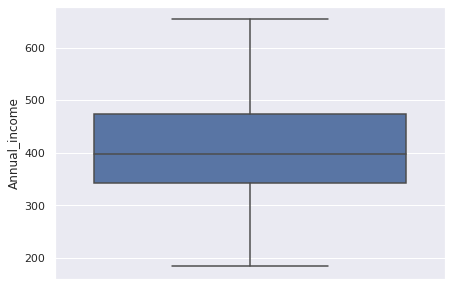

In [ ]:
sns.boxplot(y=continues_6['Annual_income'])

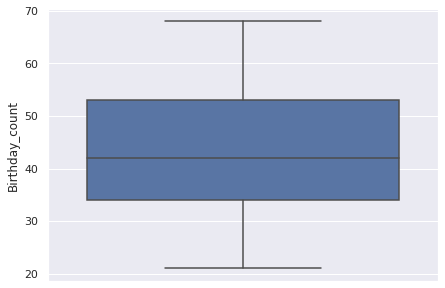

In [ ]:
sns.boxplot(y=continues_4['Birthday_count'])

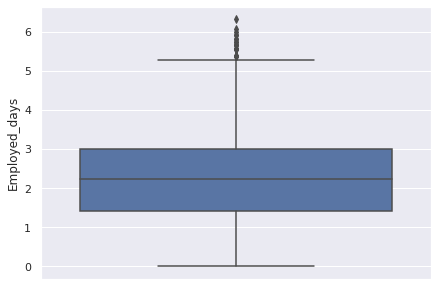

In [ ]:
sns.boxplot(y=continues_4['Employed_days'])

In [ ]:
Q1 = np.percentile(continues_6['Employed_days'], 25, interpolation = 'midpoint')
Q2 = np.percentile(continues_6['Employed_days'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(continues_6['Employed_days'], 75, interpolation = 'midpoint')

In [ ]:
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)
outlier =[]
for x in continues_6['Employed_days']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

Interquartile range is 1.5857864376269049
low_limit is -0.964466094067262
up_limit is 5.378679656440357
 outlier in the dataset is [5.744562646538029, 6.0, 6.324555320336759, 5.830951894845301, 5.5677643628300215, 5.5677643628300215, 5.830951894845301, 5.385164807134504, 6.082762530298219, 5.656854249492381, 5.385164807134504, 5.744562646538029, 5.5677643628300215, 5.656854249492381, 5.656854249492381, 5.385164807134504, 5.5677643628300215, 5.5677643628300215, 5.916079783099616, 5.916079783099616, 5.385164807134504, 5.385164807134504]


In [ ]:
continues_6.drop(continues_6[ (continues_6.Employed_days > up_lim) | (continues_6.Employed_days< low_lim) ].index , inplace=True)

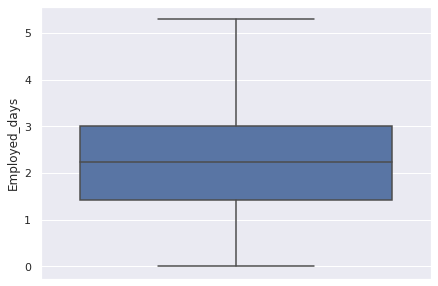

In [ ]:
sns.boxplot(y=continues_6['Employed_days'])

In [ ]:
X = continues_4.drop(['Ind_ID'],axis=1)
Y = cred_label_raw['label']

In [ ]:
### To ignore warnings
import warnings 
warnings.filterwarnings('ignore')

### Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score

In [ ]:
### random state train test split will be same with all people using random_state=16
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=15)


Feature Scaling

In [ ]:
### Crating a standard scaler object
scaler=StandardScaler()
scaler

StandardScaler()

In [ ]:
### using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.77501359, -0.82818925,  0.73471943, ...,  0.67375597,
        -0.42923131,  0.87407776],
       [-0.77501359, -0.82818925, -1.36106377, ...,  0.41322202,
        -1.85021709, -1.20819081],
       [-0.77501359,  1.20745349,  0.73471943, ..., -0.88944769,
        -0.42923131,  1.91521204],
       ...,
       [-0.77501359,  1.20745349,  0.73471943, ...,  1.19482385,
        -0.42923131, -1.20819081],
       [ 1.29307321,  1.20745349, -1.36106377, ..., -0.97629234,
        -1.02981057,  1.91521204],
       [ 1.29307321, -0.82818925,  0.73471943, ...,  1.2816685 ,
        -0.20940405, -0.16705653]])

In [ ]:
#here using transform only to avoid data leakage
# (training mean and training std will be used for standardisation when we use transform)
X_test=scaler.transform(X_test)
X_test

array([[-0.77501359, -0.82818925,  0.73471943, ...,  1.36851315,
         0.74413613, -1.20819081],
       [ 1.29307321,  1.20745349,  0.73471943, ...,  0.76060062,
         0.15936027, -0.16705653],
       [ 1.29307321,  1.20745349, -1.36106377, ..., -1.14998164,
        -1.85021709,  0.87407776],
       ...,
       [-0.77501359, -0.82818925,  0.73471943, ...,  1.10797921,
         1.10780069, -0.16705653],
       [-0.77501359, -0.82818925, -1.36106377, ...,  1.36851315,
        -0.68998706, -0.16705653],
       [-0.77501359,  1.20745349,  0.73471943, ...,  1.97642568,
        -0.42923131, -0.16705653]])

# Models

Logistic Regression Model

In [ ]:
### Creating a Logistic regression object
logistic_reg=LogisticRegression(random_state = 0)

In [ ]:
### Passing independant and dependant training data to the model
logistic_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
logistic_reg_pred=logistic_reg.predict(X_test)
logistic_reg_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Accuracy Score

In [ ]:
confusion_mat=confusion_matrix(y_test, logistic_reg_pred)
confusion_mat

array([[208,   0],
       [ 25,   0]])

In [ ]:
print(round(accuracy_score(y_test, logistic_reg_pred), 2))

0.89


In [ ]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, logistic_reg_pred)
auc
#this means model is not performing well

0.5

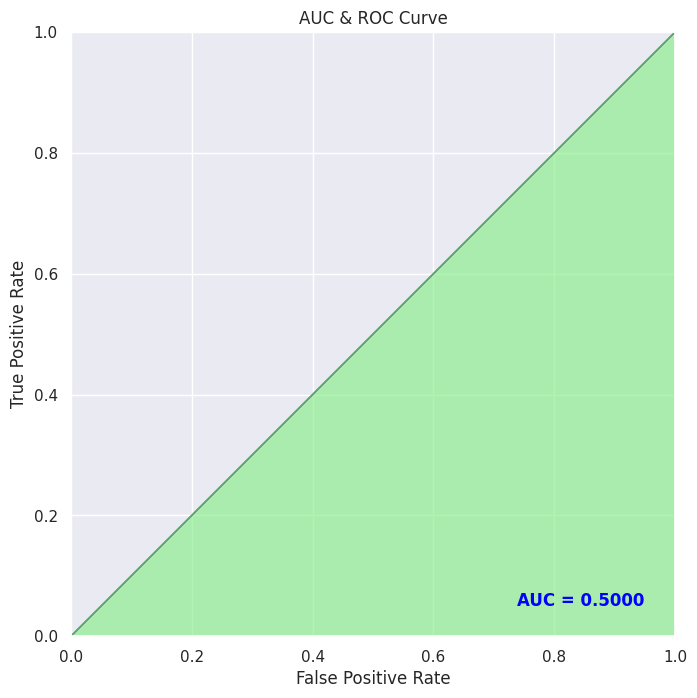

In [ ]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, logistic_reg_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#KNN Algorithm

In [ ]:
### random state train test split will be same with all people using random_state=16
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=16)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler    
scaler=StandardScaler()
scaler

### using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
X_train

X_test=scaler.transform(X_test)
X_test

array([[ 1.30978787,  1.21350844, -1.36014705, ..., -0.57479299,
        -0.41315289, -0.16340894],
       [ 1.30978787, -0.8240569 , -1.36014705, ..., -0.2232962 ,
         0.32990552,  0.97102618],
       [-0.76485121, -0.8240569 , -1.36014705, ...,  0.39182317,
         2.55770798, -0.16340894],
       ...,
       [-0.76485121,  1.21350844,  0.73521462, ..., -1.45353495,
        -1.00848637, -0.16340894],
       [ 1.30978787,  1.21350844,  0.73521462, ..., -0.3990446 ,
        -0.19524571, -0.16340894],
       [ 1.30978787, -0.8240569 ,  0.73521462, ..., -0.57479299,
         1.72310685, -0.16340894]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train) 

KNeighborsClassifier()

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#Creating the Confusion matrix  , accuracy score and classification report.
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
cm= confusion_matrix(y_test, y_pred) 
print(cm)
score=accuracy_score(y_test, y_pred)
print(score)

[[406  10]
 [ 43   6]]
0.886021505376344


K fold cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [ ]:
#Implementing cross validation
 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = KNeighborsClassifier()
acc_score = []


In [ ]:
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.43548387096774194, 0.9064516129032258, 0.964516129032258, 0.9385113268608414, 0.9676375404530745]
Avg accuracy : 0.8425200960434284


KNN model is working better

# Random Forest

In [ ]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)  
  

In [ ]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)    

In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [ ]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [ ]:
#Output
print(cm)

[[343   3]
 [ 26  15]]


As we can see in the above matrix, there are 5+24= 29 incorrect predictions and 341+17= 358 correct predictions.

#SVM Algorithm

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=109) # 70% training and 30% test

In [ ]:
#Importing SVM model
from sklearn import svm

#Creating a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
cm= confusion_matrix(y_test, y_pred) 
cm

array([[416,   0],
       [ 49,   0]])

In [ ]:
# print prediction results
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       416
           1       0.00      0.00      0.00        49

    accuracy                           0.89       465
   macro avg       0.45      0.50      0.47       465
weighted avg       0.80      0.89      0.84       465



Hyperparameter Tuning Using Gridsearch

#Decision Tree

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importing train_test_split function
from sklearn import metrics #Importing scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=102) # 75% training and 25% test

In [ ]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier()

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classification.predict(X_test)

In [ ]:
print(f"Decision tree training set accuracy: {format(classification.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 0.9940 
Decision tree testing set accuracy: 0.8553 


In [ ]:
# Model Accuracy, how often is the classifier correct?
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       342
           1       0.39      0.44      0.42        45

    accuracy                           0.86       387
   macro avg       0.66      0.68      0.67       387
weighted avg       0.86      0.86      0.86       387



In [ ]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier(criterion="entropy", max_depth = 5)

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classification.predict(X_test)

In [ ]:
print(f"Decision tree training set accuracy: {format(classification.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 0.9001 
Decision tree testing set accuracy: 0.8863 


In [ ]:
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       342
           1       0.55      0.13      0.21        45

    accuracy                           0.89       387
   macro avg       0.72      0.56      0.58       387
weighted avg       0.86      0.89      0.85       387

